In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
from operator import add
from pyspark import SparkContext
from nltk.corpus import stopwords
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
filtered_words = [word for word in stopwords.words('english')]
filtered_words.extend(['the','say','could','would','may','nd','one','two','three','four','five',''])
print(filtered_words)
punctuations = ['!',',','.','?','"','\'',':',';','\\']
concate = '-'

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [3]:
def Func_1(line):
    row = ""
    line = line.replace("\"", "")
    line = line.replace("\'", "")
    line = line.split(",b")
    for idx,cell in enumerate(line):
        if(idx>=1):
            size = len(cell)
            cell = cell.lower()
            cell_array = cell.split(" ")
            for word in cell_array:
                if len(word)<2: continue
                if any(char.isdigit() for char in word): continue 
                if 'aaa' in word : continue 
                if word not in filtered_words:
                    for punc in punctuations:
                        word = word.replace(punc,"")
                    if word.startswith('[') or word.startswith('(') or word.startswith('*') or word.startswith('&') or word.startswith('$'): continue
                    word = lemmatizer.lemmatize(word,'v')
                    if len(word)<2 or word in filtered_words : continue
                    if word[0].isdigit(): continue
                    row = row + word +" "
           
    return row

def cmp(a, b):
    if b[1] < a[1]:
        return -1
    if a[1] < b[1]:
        return 1
    return 0

In [4]:
sc =SparkContext()
rdd = sc.textFile('data/new_data.csv')
#rdd.take(5)
lines = rdd.map(Func_1)
docs=lines.take(1989)
counts = lines.flatMap(lambda x: x.split(' '))
counts = counts.filter(lambda x: x not in filtered_words)
counts = counts.map(lambda x: (x, 1)) \
                  .reduceByKey(add)
output = counts.collect()
output.sort()
output = sorted(output,key=lambda x: x[1],reverse = True)
#print(output)
sc.stop()

In [5]:
vectorizer_0 = TfidfVectorizer()
vz = vectorizer_0.fit_transform(docs)
words = vectorizer_0.get_feature_names()

In [8]:
tfidf = dict(zip(vectorizer_0.get_feature_names(), vectorizer_0.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']
tfidf.head()

,tfidf
aafia,7.497278
aamir,7.902743
ababa,7.902743
aback,7.902743
aban,7.902743


In [9]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
us,2.589537
kill,2.755248
israel,2.778779
people,2.892107
war,2.926009
israeli,2.936408
world,2.936408
new,2.990088
government,2.990088
attack,3.062500


In [10]:
df = pd.read_csv("data\Combined_data.csv")
df_0=df[(df['Label'].isin([0]))]
df_1=df[(df['Label'].isin([1]))]

In [11]:
sc =SparkContext()
rdd = sc.textFile('data/new_data_1.csv')
#rdd.take(5)
lines = rdd.map(Func_1)
docs_1=lines.take(1989)
counts = lines.flatMap(lambda x: x.split(' '))
counts = counts.filter(lambda x: x not in filtered_words)
counts = counts.map(lambda x: (x, 1)) \
                  .reduceByKey(add)
output = counts.collect()
output.sort()
output = sorted(output,key=lambda x: x[1],reverse = True)
#print(output)
sc.stop()
sc =SparkContext()
rdd = sc.textFile('data/new_data_0.csv')
#rdd.take(5)
lines = rdd.map(Func_1)
docs_0=lines.take(1989)
counts = lines.flatMap(lambda x: x.split(' '))
counts = counts.filter(lambda x: x not in filtered_words)
counts = counts.map(lambda x: (x, 1)) \
                  .reduceByKey(add)
output = counts.collect()
output.sort()
output = sorted(output,key=lambda x: x[1],reverse = True)
#print(output)
sc.stop()

In [12]:
news = []
news.append("")
for sentence in docs_0:
    news[0]+= sentence
news.append("")

for sentence in docs_1:
    news[1]+= sentence

In [13]:
vectorizer_1 = TfidfVectorizer()
vz_news = vectorizer_1.fit_transform(news)
words = vectorizer_1.get_feature_names()

In [14]:
ranking_0 = []
for j in range(len(words)):
        if vz_news[0,j] > 0.1:
              ranking_0.append((words[j], vz_news[0,j]))
df_0_ranking = pd.DataFrame(ranking_0,columns=["term","rank"])
print(df_0_ranking.sort_values("rank",ascending=False))


          term      rank
11          us  0.328801
4       israel  0.225862
6         kill  0.169548
5      israeli  0.163492
1         gaza  0.158648
12         war  0.154409
8       people  0.134427
7          new  0.129583
3         iran  0.127161
9       police  0.117472
13       world  0.117472
0       attack  0.113839
2   government  0.113234
14       years  0.105362
10          uk  0.102334


In [15]:
ranking_1 = []
for j in range(len(words)):
        if vz_news[1,j] > 0.1:
              ranking_1.append((words[j], vz_news[1,j]))
df_1_ranking = pd.DataFrame(ranking_1,columns=["term","rank"])
print(df_1_ranking.sort_values("rank",ascending=False))

          term      rank
12          us  0.298699
3       israel  0.225884
5         kill  0.187617
4      israeli  0.177518
13         war  0.153601
8       police  0.134468
1         gaza  0.133936
7       people  0.126495
6          new  0.125432
2   government  0.124901
0       attack  0.114271
14       world  0.112676
11          uk  0.104704
9        right  0.101515
10       state  0.100452


## Visualization
#### Map each record into 2D feature space.

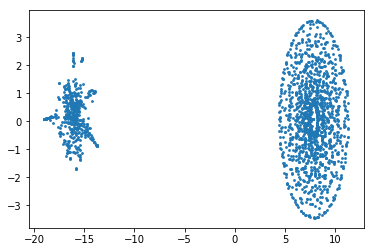

In [71]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

n_comp=30
svd = TruncatedSVD(n_components=n_comp, random_state=42)
svd_tfidf = svd.fit_transform(vz)
plt.scatter(tsne[:,0], tsne[:,1], lw=0, s=8,c=labels)

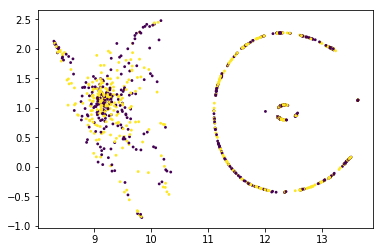

In [76]:
tsne = TSNE(random_state=20190509,perplexity=300, early_exaggeration=20).fit_transform(svd_tfidf)
plt.scatter(tsne[:,0], tsne[:,1], lw=0, s=8,c=labels)